In [1]:
import pandas as pd
import numpy as np

In [ ]:
path = '../../data/gtd.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')
print("Original DataFrame size:", len(df))
df = df.loc[(df['iyear'] != 0) & (df['imonth'] != 0) & (df['iday'] != 0)]
df = df[(df["gname"] != 'Unknown')]
df = df[df['weaptype1_txt'] != 'Unknown']
print("Filtered DataFrame size:", len(df))

C:\Users\alexa\AppData\Local\Temp\ipykernel_15732\3439937329.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='ISO-8859-1')


Original DataFrame size: 181691
Filtered DataFrame size: 87500


In [3]:
partition3 = df[(df['iyear'] >= 1996) & (df['iyear'] <= 2010)]
partition3['attack_date'] = pd.to_datetime({'year': partition3['iyear'], 'month': partition3['imonth'], 'day': partition3['iday']})

groups = partition3.groupby(['iyear', 'gname']).size().reset_index(name='count')
top5 = groups.groupby('gname')['count'].sum().nlargest(5).index

top5

C:\Users\alexa\AppData\Local\Temp\ipykernel_15732\2895510119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partition3['attack_date'] = pd.to_datetime({'year': partition3['iyear'], 'month': partition3['imonth'], 'day': partition3['iday']})


Index(['Taliban', 'Communist Party of India - Maoist (CPI-Maoist)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Liberation Tigers of Tamil Eelam (LTTE)',
       'Tehrik-i-Taliban Pakistan (TTP)'],
      dtype='object', name='gname')

In [4]:
partition3 = partition3[partition3['gname'].isin(top5)]
partition3 = partition3[partition3['gname'] != 'Communist Party of India - Maoist (CPI-Maoist)']
partition3 = partition3[partition3['gname'] != 'Taliban']
partition3 = partition3[partition3['gname'] != 'Tehrik-i-Taliban Pakistan (TTP)']

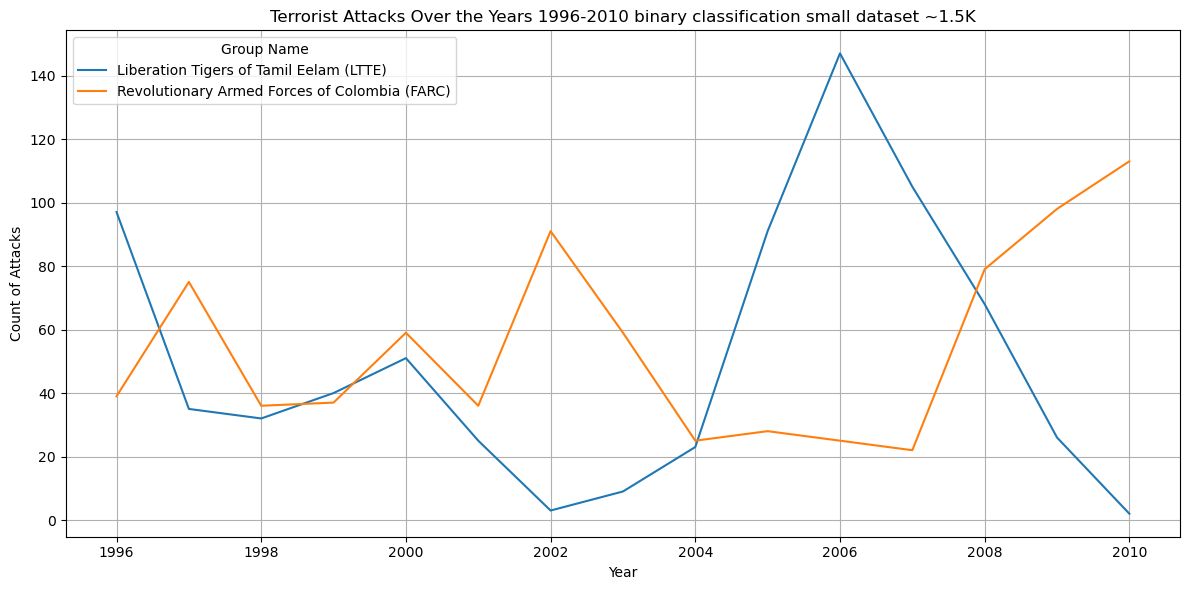

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = partition3.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1996-2010 binary classification small dataset ~1.5K')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
groups = ['Revolutionary Armed Forces of Colombia (FARC)', 'Liberation Tigers of Tamil Eelam (LTTE)']

def counts(dataframe, groups):
    total = 0
    for gname in groups:
        count = len(dataframe[dataframe['gname'] == gname])
        total += count
        print(f'{gname}: {count}')
    return total

# Call the function with the DataFrame and groups
total = counts(partition3, groups)
print('Total before splitting:', total)


Revolutionary Armed Forces of Colombia (FARC): 822
Liberation Tigers of Tamil Eelam (LTTE): 754
Total before splitting: 1576


In [7]:
train_size = int(0.7 * total)
print(partition3.iloc[train_size]['attack_date'])  # If train_size is an integer position

2007-04-12 00:00:00


In [8]:
partition3.sort_values(by='attack_date')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,attack_date
61301,199601040003,1996,1,4,NaN,0,NaN,186,Sri Lanka,6,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1996-01-04
61303,199601040005,1996,1,4,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1996-01-04
61308,199601050005,1996,1,5,NaN,0,NaN,186,Sri Lanka,6,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1996-01-05
61322,199601060002,1996,1,6,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1996-01-06
61483,199601220003,1996,1,22,NaN,0,NaN,186,Sri Lanka,6,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1996-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99332,201012020001,2010,12,2,NaN,0,NaN,45,Colombia,3,...,"Colombian Armed Forces, ""FARC Guerrillas Incin...","Colombian Human Rights, ""Attacks Against Goods...","Caracol Colombia Radio, ""FARC Incursion on Isn...",ISVG,0,0,0,0,NaN,2010-12-02
99428,201012090014,2010,12,9,NaN,0,NaN,45,Colombia,3,...,"Colombian Armed Forces, Fabio Aerenas Jaimes, ...","El Nuevo Dia, ""Bomb Explodes in Copifam Drug S...","Ecos del Colombia, ""Attack Against Copifam Dru...",ISVG,0,0,0,0,NaN,2010-12-09
99470,201012130013,2010,12,13,NaN,0,NaN,45,Colombia,3,...,"Colombian National Army, ""Land Mine Planted by...","El Nuevo Siglo, ""Minefield Planted by the FARC...",NaN,ISVG,0,0,0,0,NaN,2010-12-13
99517,201012160018,2010,12,16,NaN,0,NaN,45,Colombia,3,...,"Colombian Armed Forces, ""FARC Attack Foiled,"" ...","Colombian National Army, ""Terrorist Acts in th...","Colombian Human Rights, ""Disposal of Explosive...",ISVG,0,0,0,0,NaN,2010-12-16


In [9]:
train_date = '2007-04-12'
train_df = partition3[partition3['attack_date'] <= train_date]
test_df = partition3[partition3['attack_date'] > train_date]

In [10]:
print('Train %: ', len(train_df)/len(partition3))
print('Test %: ', len(test_df)/len(partition3))

Train %:  0.7011421319796954
Test %:  0.29885786802030456


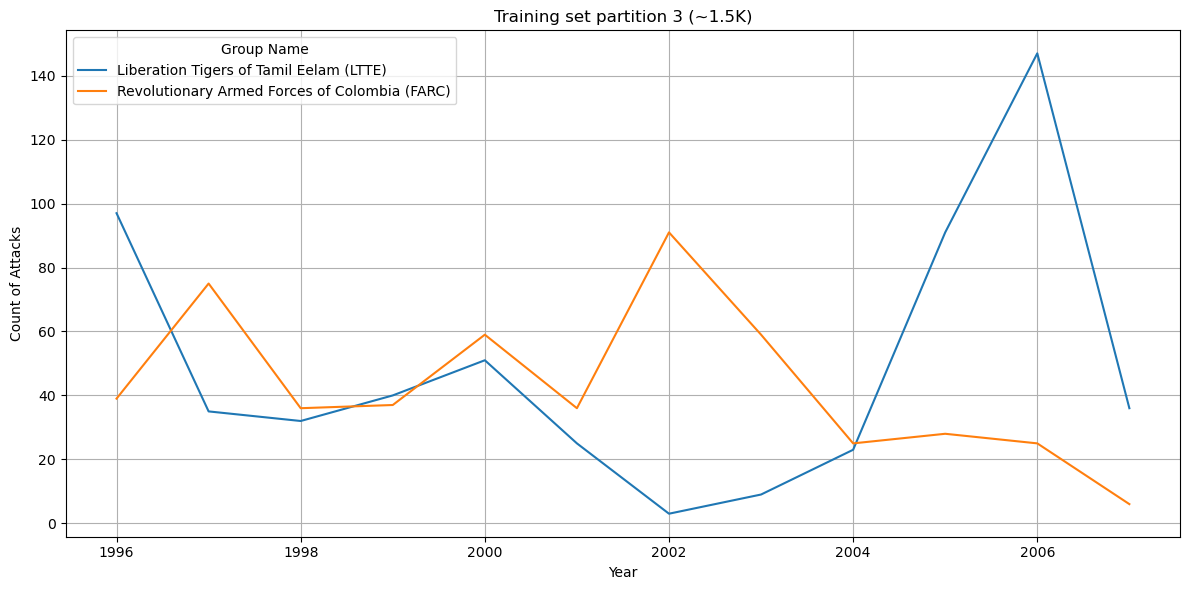

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = train_df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Training set partition 3 (~1.5K)')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [12]:
total_train = counts(train_df, groups)
print('Total train size: ', total_train)

Revolutionary Armed Forces of Colombia (FARC): 516
Liberation Tigers of Tamil Eelam (LTTE): 589
Total train size:  1105


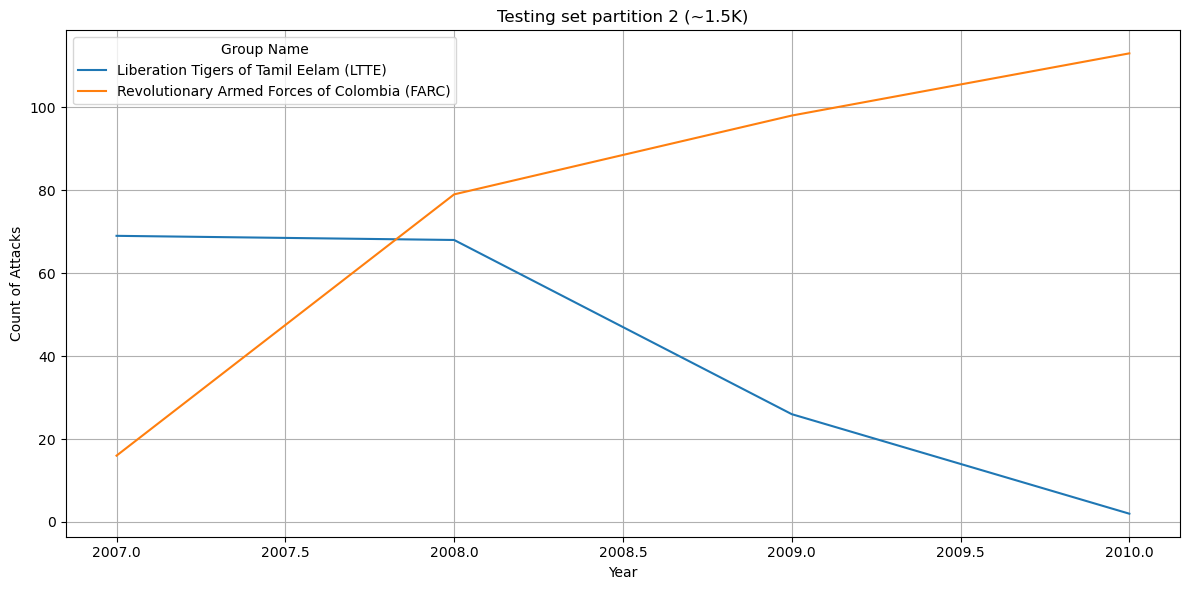

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = test_df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Testing set partition 2 (~1.5K)')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [14]:
total_test = counts(test_df, groups)
print('Total test size: ', total_test)

Revolutionary Armed Forces of Colombia (FARC): 306
Liberation Tigers of Tamil Eelam (LTTE): 165
Total test size:  471
